In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#MODELO 2: KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report



## DATAFRAME

In [2]:
df = pd.read_csv("../data/processed/simple.csv")
df.head(1)

,Stress,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Smoking_encoder,Weight_encoder
0,1,19,0,1.0,0.0,1.0,0.0,0.0


## Train/test

In [3]:
X = df.drop(columns = ["Hair Loss"])
y = df["Hair Loss"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 7)
(799,)
(200, 7)
(200,)


## Escalado

In [5]:
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(X_train)

X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

## Entrenamiento

In [6]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

## Predicciones

In [7]:
pred = knn.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_test, pred))
print("precision: ", precision_score(y_test, pred))
print("Recall: ", recall_score(y_test, pred))

Accuracy:  0.55
precision:  0.5106382978723404
Recall:  0.5217391304347826


<Axes: >

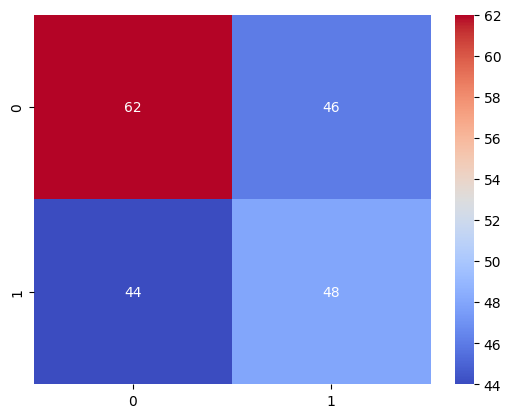

In [8]:
sns.heatmap(confusion_matrix(y_test, pred), cmap = "coolwarm",annot= True)

In [9]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58       108
           1       0.51      0.52      0.52        92

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



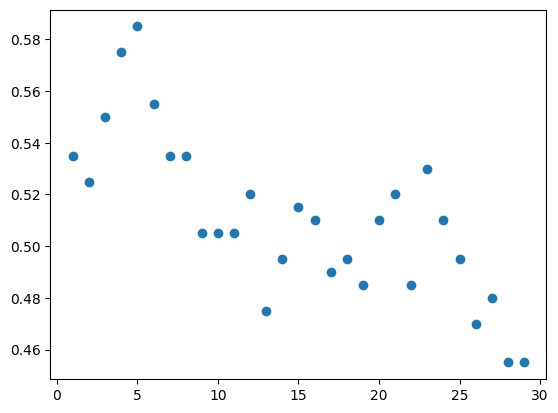

In [10]:
k_range = range(1,30)
scores = []

for i in k_range:
    knn =KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)
    pred_scores = knn.score(X_test_scaled, y_test)
    scores.append(pred_scores)

plt.scatter(k_range, scores)

In [11]:
scores

[0.535,
 0.525,
 0.55,
 0.575,
 0.585,
 0.555,
 0.535,
 0.535,
 0.505,
 0.505,
 0.505,
 0.52,
 0.475,
 0.495,
 0.515,
 0.51,
 0.49,
 0.495,
 0.485,
 0.51,
 0.52,
 0.485,
 0.53,
 0.51,
 0.495,
 0.47,
 0.48,
 0.455,
 0.455]

## PKL

In [12]:
import pickle

# Guardar MinMaxScaler
with open('../models/M2B_minmax_scaler.pkl', 'wb') as f:
    pickle.dump(minmax_scaler, f)

# Guardar el modelo KNN
with open('../models/M2B_KNN.pkl', 'wb') as f:
    pickle.dump(knn, f)


In [13]:
with open('../models/M2B_minmax_scaler.pkl', 'rb') as f:
    minmax_scaler_loaded = pickle.load(f)

# Cargar el modelo KNN
with open('../models/M2B_KNN.pkl', 'rb') as f:
    knn_loaded = pickle.load(f)


In [14]:
#usar para predecir

# Escalar los datos nuevos con el scaler cargado
X_test_scaled = minmax_scaler_loaded.transform(X_test)

# Hacer predicciones con el modelo cargado
y_pred = knn_loaded.predict(X_test_scaled)
